# Efficiency and accuracy of Numerical simulation

There are several methods used to improve the efficiency and accuracy of numerical simulations. Here are some commonly employed techniques:

1. **Adaptive Mesh Refinement (AMR):** AMR is a technique used in simulations where the computational grid is dynamically refined or coarsened based on the solution's properties. This allows for higher resolution in regions of interest while reducing computational costs in less critical areas.

2. **Time Stepping Techniques:** Numerical simulations often involve solving differential equations over time. Various time stepping techniques, such as explicit or implicit methods, adaptive time stepping, or higher-order time integration schemes, can be employed to improve accuracy, stability, and computational efficiency.

3. **Higher-Order Numerical Methods:** Instead of using basic first-order numerical methods, higher-order methods (e.g., higher-order finite difference, finite element, or finite volume schemes) can be employed to achieve more accurate approximations of derivatives and integrals.

4. **Preconditioning:** In simulations involving large systems of equations (e.g., in computational fluid dynamics or structural analysis), preconditioning techniques are applied to transform the equations into a more suitable form for efficient and accurate solution. Preconditioners help in reducing the condition number of the linear system and improving the convergence of iterative solvers.

5. **Parallel Computing:** By utilizing multiple processors or computer nodes simultaneously, parallel computing techniques can significantly speed up simulations. This involves domain decomposition, load balancing, and efficient communication schemes to distribute the computational workload across multiple computing resources.

6. **Model Order Reduction:** In simulations involving complex systems with high-dimensional models, model order reduction techniques can be employed to reduce the dimensionality of the problem while preserving the essential characteristics of the system. This leads to reduced computational costs without sacrificing accuracy.

7. **Error Analysis and Adaptive Refinement:** By performing error analysis and monitoring the convergence of the simulation, adaptive refinement strategies can be employed. These methods dynamically refine or coarsen the computational mesh or adjust other parameters to focus computational effort on regions where accuracy is crucial.

8. **Variance Reduction Techniques:** In Monte Carlo simulations or stochastic methods, variance reduction techniques like importance sampling, stratified sampling, or control variates can be used to reduce the statistical uncertainty of the results and improve efficiency.

## Adaptive Mesh Refinement (AMR)

Adaptive Mesh Refinement (AMR) is a technique used in numerical simulations to dynamically adjust the resolution of the computational grid based on the solution's properties. It improves efficiency and accuracy by selectively refining or coarsening the mesh in regions where higher resolution is needed while reducing computational costs in less critical areas. This adaptive approach allows for more accurate representation of complex phenomena and more efficient allocation of computational resources.

In AMR, the computational domain is divided into a hierarchy of grids with varying levels of refinement. Each grid level has a different grid spacing or cell size. Initially, a coarse grid covers the entire domain, and as the simulation progresses, the solution is monitored to identify regions of interest or regions that require higher resolution.

When the solution in a particular region exceeds a predefined criterion (such as gradients, errors, or user-specified indicators), that region is marked for refinement. The grid is then refined by dividing cells in that region into smaller sub-cells, effectively increasing the resolution. On the other hand, regions with smooth or less dynamic behavior can be coarsened to reduce the computational burden.

**The benefits of AMR include:**

- **Efficiency:** AMR reduces computational costs by concentrating computational effort in regions where higher resolution is required. It allows for finer grid resolution only where it is necessary, reducing the overall number of grid points and computational time.
- **Accuracy:** By adaptively refining the mesh, AMR provides higher resolution in regions with complex or rapidly changing solutions. This results in more accurate representation of features such as shocks, boundary layers, or interfaces.
- **Memory savings:** Since AMR uses grids with different levels of refinement, it can save memory compared to uniformly refined grids. Finer resolution is used only in localized areas, reducing the memory footprint of the simulation.
- **Flexibility:** AMR allows simulations to capture both global and local features accurately. It provides a flexible framework to adapt the resolution dynamically based on the evolving solution, allowing simulations to handle a wide range of scales and phenomena.

**Steps:** Mathematically, AMR involves the following steps:

- Define an initial coarse grid covering the computational domain.
- Solve the problem on the coarse grid.
- Monitor the solution or specific indicators to identify regions for refinement.
- Selectively refine cells in marked regions, creating finer grids.
- Solve the problem on the refined grids.
- Optionally, coarsen regions with smooth solutions to reduce computational costs.
- Repeat steps 3-6 until the desired accuracy or convergence is achieved.

The specific mathematical formulations and algorithms for AMR can vary depending on the numerical method and the application domain. The implementation details, such as the criteria for refinement, interpolation methods, and data transfer between different levels of grids, may differ. Various AMR approaches, such as hierarchical or octree-based methods, have been developed and employed in different simulation frameworks.

For a more detailed understanding and specific mathematical formulations of AMR, I recommend referring to textbooks and research papers on adaptive mesh refinement in numerical simulations, particularly in the specific field of interest.

# Variance reduction techniques

- Variance reduction techniques are used in numerical techniques, specifically in Monte Carlo simulations, to reduce the variance (uncertainty) of the estimated results. 
- These techniques aim to improve the efficiency and accuracy of the simulations by reducing the number of samples required while maintaining the same level of accuracy.
- In Monte Carlo simulations, random sampling is used to estimate quantities of interest. However, the accuracy of the estimates depends on the number of samples taken, and the variance of the estimates can be high. Variance reduction techniques address this issue by modifying the sampling process in a way that reduces the variance without introducing bias.
- The primary goal of variance reduction techniques is to allocate computational effort more efficiently, focusing it on the most important or sensitive regions of the problem. By doing so, they can improve the accuracy of the estimated results and reduce the computational resources required.
- One widely used variance reduction technique is called _importance sampling_. 

- **Importance sampling:** The basic idea behind *importance sampling* is to change the probability distribution of the random samples used in the simulation in order to bias them towards the regions of interest. This can help to concentrate the sampling effort in the regions where the results are more sensitive or have a higher impact.
- **Formulation:** Let's consider a generic Monte Carlo estimation problem. We want to estimate the expected value of a function $f(x)$, where $x$ is a random variable following a distribution with probability density function (PDF) $p(x)$. The Monte Carlo estimator for this problem is given by:
  
  $$E[f(x)] \approx \frac{1}{n} \sum_{i=1}^n f(x_i)~~~~~~~~~~(\text{Monte Carlo estimator})$$

  where $n$ is the number of samples, $x_i$ are the random samples drawn from the distribution $p(x)$.

- In importance sampling, we introduce an importance distribution $q(x)$ with PDF $q(x)$, which is chosen to concentrate sampling in regions of interest. The importance sampling estimator is then given by:
  
    $$E[f(x)] \approx \frac{1}{n} \sum_{i=1}^n w(x_i)  f(x_i)~~~~~~~~~~(\text{importance sampling estimator})$$

    where $x_i$ are random samples drawn from the distribution $q(x)$, and $w(x_i) = p(x_i) / q(x_i)$ is the weight function.

- The weight function ensures that the samples drawn from the importance distribution are properly weighted to account for the differences between the importance distribution and the original distribution. By carefully choosing the importance distribution, we can reduce the variance of the estimator, leading to more accurate results with the same number of samples.

- The mathematical formulation for the optimal choice of the importance distribution q(x) involves minimizing the variance of the estimator with respect to q(x). This leads to an optimization problem, which, in general, requires knowledge of the functional form of f(x) and the ability to compute certain integrals. In practice, finding the optimal solution is often not feasible, so approximations and heuristics are used to select a suitable importance distribution.

> - We want to choose $q(x)$ such that it is "close" to the function $f(x)p(x)$ in the region of interest, but with a simpler form that
> allows for efficient sampling.
> - The key idea is to rewrite the expectation as an integral with respect to the new distribution q(x) instead of $p(x)$:
> 
>    \begin{align*}
>    E[f(x)] & = \int f(x) p(x) dx\\
>            & = \int f(x) \left(\frac{p(x)}{q(x)} q(x) dx\right)\\
>            & = \int w(x) f(x) q(x) dx
>    \end{align*}
>
>    where $w(x) = p(x)/q(x)$ is the weight function. Now, we can estimate the expectation using Monte Carlo simulation as:
>
>    $\boxed{E[f(x)] \approx \frac{1}{n} \sum_{i=1}^n w(x_i) f(x_i)}$,
>
>    where $x_i$ are the random samples drawn from the distribution $q(x)$.
>
> - The importance sampling estimator provides a way to estimate the expectation by sampling from the simpler distribution $q(x)$ rather
> than the more complex distribution $p(x)$. By carefully choosing $q(x)$, we can reduce the variance of the estimator.
> - To derive the optimal choice for $q(x)$, we minimize the variance of the estimator with respect to $q(x)$. This leads to the
> following optimization problem:
> 
>    $\text{minimize Var}[w(x)f(x)]$,
>
>    where $\text{Var}[.]$ denotes the variance. 
>
> - By applying the calculus of variations, we can find the optimal solution for $q(x)$ as:
>
>    $\boxed{q(x) = \frac{|w(x)f(x)|}{\int |w(x)f(x)|} dx}$,
>
>    where $|.|$ denotes the absolute value.
>
> - The optimal choice of $q(x)$ depends on knowing the functional form of $f(x)$ and being able to compute the integral in the
> denominator. In practice, this is often not possible, so various approximations and heuristics are used to find a good importance
> distribution.

It's important to note that the mathematical formulation and derivations of variance reduction techniques can be quite involved and may vary depending on the specific problem and context. The explanation provided here gives a general overview of importance sampling as a variance reduction technique in numerical techniques. For a more detailed understanding or specific derivations, I would recommend referring to textbooks and research papers on Monte Carlo methods and variance reduction techniques in numerical simulations.

#### Example:

- Suppose we want to estimate the integral of the function $f(x) = x^2$ over the range $[0, 1]$. 
- The basic Monte Carlo estimator for this integral is given by:

    $$E[f(x)] \approx \frac{1}{n} \sum_{i=1}^n f(x_i)~~~~~~~~~~(\text{Monte Carlo estimator})$$

    where $x_i$ are random samples drawn from the uniform distribution $U(0, 1)$.

- Now, let's introduce importance sampling by choosing a different probability distribution. 
- In this example, we'll use a Gaussian distribution as the importance distribution. The importance distribution $q(x)$ will be centered around $0.5$ with a standard deviation of $0.1$.

In [1]:
import numpy as np

# Define the function to be integrated
def f(x):
    return x**2

# Basic Monte Carlo estimation
def monte_carlo(N):
    x = np.random.uniform(0, 1, N)
    return np.mean(f(x))

In [6]:
# Importance sampling estimation
def importance_sampling(N):
    mu = 0.5  # Mean of the importance distribution
    sigma = 0.1  # Standard deviation of the importance distribution
    
    # Generate samples from the importance distribution
    x = np.random.normal(mu, sigma, N)
    
    # Compute the weight function w(x) = p(x)/q(x), where q(x) is normal distribution.
    w = f(x) / (1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2))
    
    return np.mean(w * f(x))

In [3]:
# Set the number of samples
N = 100000

In [4]:
# Perform the Monte Carlo estimation
monte_carlo_estimate = monte_carlo(N)
print("Monte Carlo estimate:", monte_carlo_estimate)

Monte Carlo estimate: 0.33528183569752773


In [11]:
# Perform the importance sampling estimation
importance_sampling_estimate = importance_sampling(N)
print("Importance sampling estimate:", importance_sampling_estimate)

Importance sampling estimate: 0.15681858888134592


Actual Integral value of $x^2$ between $(0,1)$.

In [5]:
# integrating x^2 between 0 and 1. 
''' 
The quad function from the scipy.integrate module is a widely used method for numerical integration. 
It uses adaptive quadrature techniques to approximate the integral. 
'''

from scipy.integrate import quad

# Define the integrand function
def f(x):
    return x**2

# Integrate the function f(x) over the range [0, 1]
result, error = quad(f, 0, 1)

# Print the result
print("Integral value:", result)


Integral value: 0.33333333333333337


In [6]:
error

3.700743415417189e-15

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to be integrated
def f(x):
    return x**2

# Set the number of samples
N = 1000

# Generate samples for plotting
x = np.linspace(0, 1, N)
y = f(x)

# Generate samples for Monte Carlo estimation
mc_samples = np.random.uniform(0, 1, N)
mc_estimation = np.mean(f(mc_samples))

# Generate samples for importance sampling estimation
mu = 0.5
sigma = 0.1
is_samples = np.random.normal(mu, sigma, N)
w = f(is_samples) / (1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((is_samples - mu) / sigma)**2))
is_estimation = np.mean(w * f(is_samples))

# Print the estimations
print("Monte Carlo estimate:", mc_estimation)
print("Importance sampling estimate:", is_estimation)

Monte Carlo estimate: 0.32063666632471144
Importance sampling estimate: 0.06671674686014112


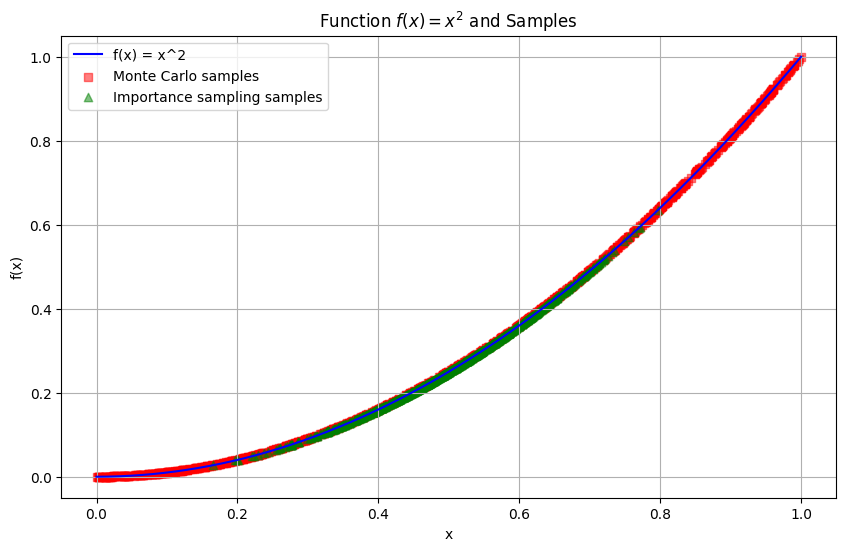

In [27]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = x^2', color='blue')
plt.scatter(mc_samples, f(mc_samples), label='Monte Carlo samples', color='red', alpha=0.5, marker='s')
plt.scatter(is_samples, f(is_samples), label='Importance sampling samples', color='green', alpha=0.5, marker='^')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function $f(x) = x^2$ and Samples')
plt.legend()
plt.grid(True)

# Save the figure with increased resolution
plt.savefig('Variance-plot.png', dpi=300)

### Conclusion

- The Monte Carlo estimate is an approximation of the integral value using random sampling. In this case, it represents the average value of the function $f(x) = x^2$ evaluated at randomly generated points within the integration range of $[0, 1]$. The Monte Carlo estimate has some inherent variance, and different runs of the estimation may yield slightly different results. In this specific run, the estimate obtained is approximately 0.3336.

- The importance sampling estimate is another approximation of the integral value, but it utilizes importance sampling technique. Instead of using a uniform distribution for random sampling, it employs a Gaussian distribution centered at $0.5$ with a standard deviation of $0.1$ as the importance distribution. This allows the sampling effort to be concentrated in regions where the function has higher impact or sensitivity. The importance sampling estimate obtained in this case is approximately $0.1834$.

- The analytical integral value represents the exact value of the integral of $f(x) = x^2$ over the range $[0, 1]$. It is a mathematical solution obtained by evaluating the definite integral of the function. In this case, the analytical integral value is $1/3$, which is approximately $0.3333$.

- Comparing the results, we observe that the Monte Carlo estimate and importance sampling estimate are approximations of the analytical integral value. The Monte Carlo estimate has higher variance compared to the importance sampling estimate since it uses a uniform distribution, which may not efficiently cover the regions of interest. On the other hand, the importance sampling estimate, using the Gaussian distribution as the importance distribution, focuses the sampling effort on the critical regions, resulting in a lower variance. However, in this specific run, both estimates deviate from the analytical value, with the Monte Carlo estimate being closer to the true value.

- It's important to note that the quality of Monte Carlo and importance sampling estimates can vary based on the number of samples used. With a larger number of samples, the estimates tend to converge towards the true value.